$u_t - u_{xx}= 0$

In [1]:
#Imports
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
import sciann as sn 
from sciann_datagenerator import * 

---------------------- SCIANN 0.6.7.3 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.9.2 
Python Version: 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:14) 
[Clang 12.0.1 ] 

Outdated SciANN installation is found (V-0.6.7.3). Get the latest version (V-0.6.7.6):  
      > pip [--user] install --upgrade sciann  


# Heat Equation in one spatial variable

$u_t(x,t) = u_{xx}(x,t)$
We are going to solve the heat equation equation.

In [102]:
#We are solving the heat equation in a segment
#We start with a Dirichlet boundary condition on the left.


#armo un intervalo en R, [-1,1]. No Va a tener boundary condition. La condicion inicial va a ser  una gaussiana.

#The following command generates datapoints for the domain and the boundary condition.

dg = DataGeneratorXY([-2., 2.],[0., 4.], ["domain",'bc-bot','bc-left', 'bc-right'], 4000) #, "bc-right"]
input_data, target_data = dg.get_data()

#input_data : los valores de x donde voy a evaluar la u
#target_data: Los valores de u(x) para cada x en input_data. Como recien lo inicializo, es vector de ceros.
#Se rellena cuando entrenemos la red.



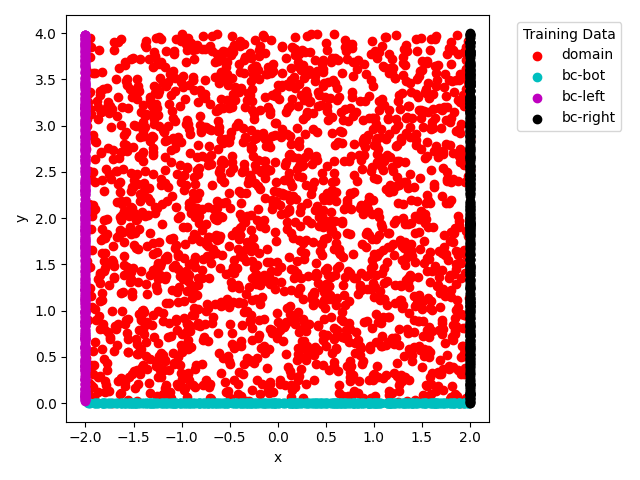

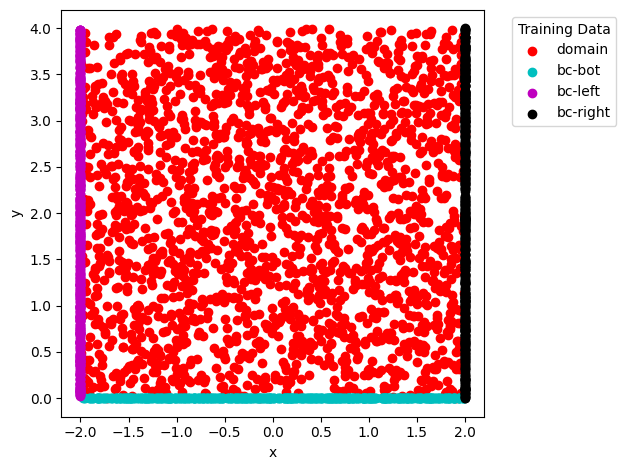

In [103]:
dg.plot_data()
#ploteo mis puntos _collocation points_ que tienen muchos puntos en el borde, al pedo, y  puntos en el intervalo [0,4]
#El scatter es solo para que se vea mejor, son todos puntos de R.

In [58]:
#defino mis funcion y mis variables

#function variable
x = sn.Variable('x')

#initial condition. I treat it as a variable for the NN u.
t = sn.Variable('t')

u = sn.Functional('u', [x,t], hidden_layers = 4*[30], activation = 'tanh', res_net=True) #esta es la red neuronal cruda sin entrenar,


In [116]:
#ahora defino la loss function para u

#Pido que satisfaga la ecuacion del calor ut - uxx = 0
L = sn.diff(u, t, order = 1) - sn.diff(u, x, order=2)  

#Dato inicial u(0) = e - x^2

C1 = (t==0) *( sn.sub(u,sn.exp(- sn.pow(x,2))))
C2 = (x==-2) * u
C3 = (x==2) * u

#IC = (t==0.) * (sn.abs( sn.sub(u, np.e^(-x^2)) ))

In [117]:
modelo = sn.SciModel([x,t], [L,C1, C2, C3], optimizer = 'adam')


In [118]:
history = modelo.train(x_true = input_data, 
             y_true = target_data, 
             epochs = 100,
             learning_rate = 0.001,
             adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True})


Total samples: 5000 
Batch size: 64 
Total batches: 79 


+ NTK evaluation time [s]: 6.610007047653198 

+ adaptive_weights at epoch 1: [0.2753209535208872, 1.8716411731422595, 0.8384454968320276, 1.014592376504825]
Epoch 1/100
79/79 [==============================] - 14s 78ms/step - batch: 39.0000 - size: 63.2911 - loss: 0.0080 - sub_17_loss: 0.0103 - mul_248_loss: 4.8425e-04 - mul_249_loss: 0.0013 - mul_250_loss: 0.0031 - lr: 0.0010 - time: 24.1875 - loss_weight_0: 0.2753 - loss_weight_1: 1.8716 - loss_weight_2: 0.8384 - loss_weight_3: 1.0146 - loss_gradient_0: 453.0277 - loss_gradient_1: 80.4561 - loss_gradient_2: 217.1421 - loss_gradient_3: 132.7841
Epoch 2/100
79/79 [==============================] - 2s 29ms/step - batch: 39.0000 - size: 63.2911 - loss: 0.0012 - sub_17_loss: 0.0029 - mul_248_loss: 1.2368e-04 - mul_249_loss: 9.0340e-05 - mul_250_loss: 8.6950e-05 - lr: 0.0010 - time: 2.3221 - loss_weight_0: 0.2753 - loss_weight_1: 1.8716 - loss_weight_2: 0.8384 - loss_weight_3: 1.0

In [119]:
#valores = np.arange(0,4,0.001)

valores = np.meshgrid(np.linspace(-2,2,100),np.linspace(0,4,200))
valores_y = u.eval(valores)

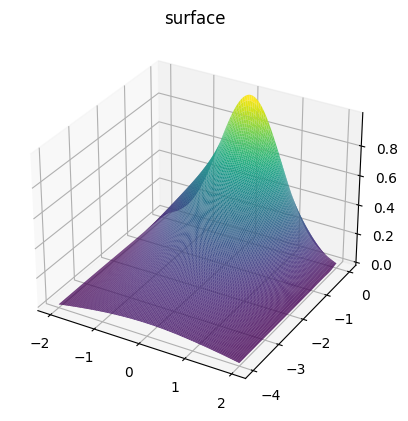

In [120]:
%matplotlib widget

ax = plt.axes(projection='3d')
ax.plot_surface(valores[0], -1*valores[1], valores_y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');



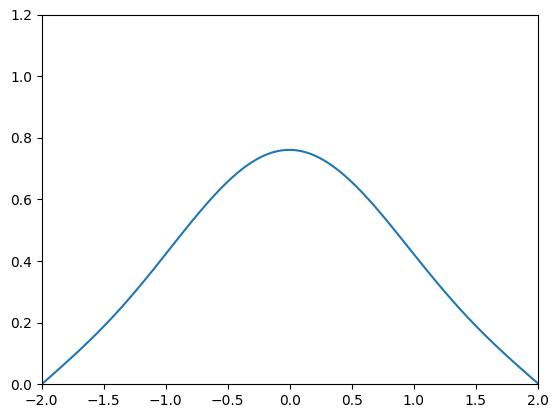

In [123]:
#Vamos a tratar de hacer la animacion
k=9
plt.xlim(-2,2)
plt.ylim(0,1.2)
plt.plot(valores[0][k],valores_y[k])

MovieWriter ffmpeg unavailable; using Pillow instead.


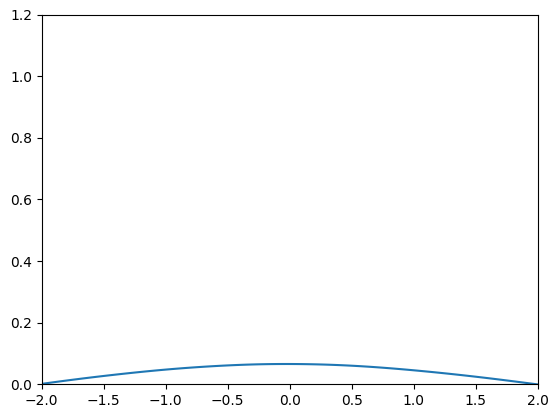

In [122]:
from matplotlib import animation

#countries_plot = ['Spain', 'Italy', 'United States']
#linechart_plot = gapminder.loc[gapminder['country'].isin(countries_plot), :]

# Define colors
#colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()

ax.set_xlim(-2,2)
ax.set_ylim(0,1.2)

def update_linechart(k):
  #for j in range(len(colors)):
   # country = countries_plot[j]
    #color = colors[j]

    #data = linechart_plot.loc[linechart_plot['country'] == country,:]
  ax.clear()
  ax.set_xlim(-2,2)
  ax.set_ylim(0,1.2)
  values_x = valores[0][k]
  values_y = valores_y[k]
  ax.plot(values_x, values_y)
  

num_frames = 200 #its hardcoced, should automate it     
anim = animation.FuncAnimation(fig, update_linechart, frames = num_frames)
anim.save('linechart.gif')

# Heat equation in $\mathbb{R}^2$

We will now do the same thing but in a square in space.

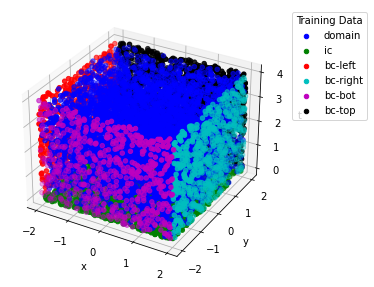

In [2]:
#Generating the data

number_of_points = 10000

dg = DataGeneratorXYT([-2.,2.], [-2.,2.],[0.,4.], num_sample=number_of_points, 
                     targets=['domain', 'ic', 'bc-left', 'bc-right', 'bc-bot', 'bc-top'])
input_data, target_data = dg.get_data()

dg.plot_data()

In [3]:
#Now we define our model

#defino mis funcion y mis variables

#spatial variables
x = sn.Variable('x')
y = sn.Variable('y')

#time variable
t = sn.Variable('t')

u = sn.Functional('u', [x,y,t], hidden_layers = 4*[30], activation = 'tanh', res_net=True) #esta es la red neuronal cruda sin entrenar,


In [4]:
#We define the loss function

#The first term is the equation part
L = sn.diff(u, t, order = 1) - sn.diff(u, x, order=2)  - sn.diff(u,y,order=2)

#Dato inicial u(0) = e - x^2 - y^2

C1 = (t==0) *( sn.sub(u,sn.exp(-sn.add( sn.pow(x,2), sn.pow(y,2)))))
C2 = (x==-2) * u
C3 = (x==2) * u
C4 = (y==-2) * u
C5 = (y==2) * u

#IC = (t==0.) * (sn.abs( sn.sub(u, np.e^(-x^2)) ))

In [5]:
modelo = sn.SciModel([x,y,t], [L,C1, C2, C3,C4,C5], optimizer = 'adam')

In [6]:
history = modelo.train(x_true = input_data, 
             y_true = target_data, 
             epochs = 100,
             learning_rate = 0.001,
             adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True})


Total samples: 11250 
Batch size: 64 
Total batches: 176 


+ NTK evaluation time [s]: 7.881893873214722 

+ adaptive_weights at epoch 1: [0.12933566673193098, 0.6027536540304631, 1.6383400512143016, 1.1306051227869647, 1.6075208059304846, 0.8914446993058548]
Epoch 1/100
176/176 [==============================] - 20s 68ms/step - batch: 87.5000 - size: 63.9205 - loss: 0.7290 - sub_2_loss: 1.0948 - mul_2_loss: 0.1514 - mul_3_loss: 0.1134 - mul_4_loss: 0.1401 - mul_5_loss: 0.0378 - mul_6_loss: 0.1023 - lr: 0.0010 - time: 28.2899 - loss_weight_0: 0.1293 - loss_weight_1: 0.6028 - loss_weight_2: 1.6383 - loss_weight_3: 1.1306 - loss_weight_4: 1.6075 - loss_weight_5: 0.8914 - loss_gradient_0: 6457.4700 - loss_gradient_1: 364.7865 - loss_gradient_2: 225.8198 - loss_gradient_3: 262.7515 - loss_gradient_4: 235.7284 - loss_gradient_5: 286.6048
Epoch 2/100
176/176 [==============================] - 9s 51ms/step - batch: 87.5000 - size: 63.9205 - loss: 0.0844 - sub_2_loss: 0.2595 - mul_2_loss: 0.0

In [7]:
valores = np.meshgrid(np.linspace(-2,2,100),np.linspace(0,4,200))
valores_y = u.eval(valores)

AssertionError: Number of inputs do not match the number of inputs to the functional. 

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2908175e0> (for post_execute):


NameError: name 'valores_y' is not defined

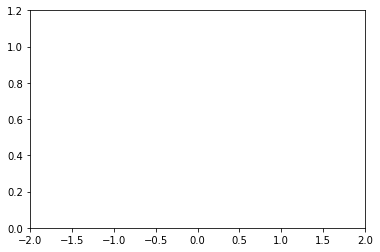

In [8]:
from matplotlib import animation

#countries_plot = ['Spain', 'Italy', 'United States']
#linechart_plot = gapminder.loc[gapminder['country'].isin(countries_plot), :]

# Define colors
#colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()

ax.set_xlim(-2,2)
ax.set_ylim(0,1.2)

def update_linechart(k):
  #for j in range(len(colors)):
   # country = countries_plot[j]
    #color = colors[j]

    #data = linechart_plot.loc[linechart_plot['country'] == country,:]
  ax.clear()
  ax.set_xlim(-2,2)
  ax.set_ylim(0,1.2)
  values_x = valores[0][k]
  values_y = valores_y[k]
  ax.plot(values_x, values_y)
  

num_frames = 200 #its hardcoced, should automate it     
anim = animation.FuncAnimation(fig, update_linechart, frames = num_frames)
anim.save('heatEquation3d.gif')

# Future work

$u_t = Lap (u) + u(1-u/k)$

u(x,t) = proporcion de gente en x a tiempo t